<a href="https://colab.research.google.com/github/minicks/Deeplearning/blob/main/2.FNN/AI%EB%8A%94_%EA%BD%83%EC%9D%84_%EA%B5%AC%EB%B6%84%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.listdir("drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_2_AI는 꽃을 구분할 수 있을까")
from tensorflow import keras

In [3]:
cd /content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_2_AI는 꽃을 구분할 수 있을까

/content/drive/MyDrive/수학·통계를 몰라도 이해할 수 있는 쉬운 딥러닝 코드 소스/[2편] 인간의 뇌세포를 흉내 낸 인공지능 - FNN/[5장] 분류(Classification) 기법 활용하기/2_5_2_AI는 꽃을 구분할 수 있을까


In [4]:
from tensorflow import keras
import data_reader

In [5]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

In [6]:
# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

Reading Data...


Data Read Done!
Training X Size : (120, 4)
Training Y Size : (120,)
Test X Size : (30, 4)
Test Y Size : (30,)




In [39]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(4),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [40]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", metrics=["accuracy"],
              loss="sparse_categorical_crossentropy")

In [41]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS, batch_size=5,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])



************ TRAINING START ************ 
Epoch 1/20
24/24 [==============================] - 0s 6ms/step - loss: 1.1073 - accuracy: 0.2917 - val_loss: 1.0910 - val_accuracy: 0.2667
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 1.0667 - accuracy: 0.3667 - val_loss: 1.0725 - val_accuracy: 0.3000
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 1.0314 - accuracy: 0.5333 - val_loss: 1.0381 - val_accuracy: 0.5667
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 1.0176 - accuracy: 0.5333 - val_loss: 1.0095 - val_accuracy: 0.5667
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.9483 - accuracy: 0.6500 - val_loss: 0.9717 - val_accuracy: 0.5667
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.9113 - accuracy: 0.6583 - val_loss: 0.9384 - val_accuracy: 0.5667
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.9038 - accuracy: 0.6417 - val_loss: 0.8966

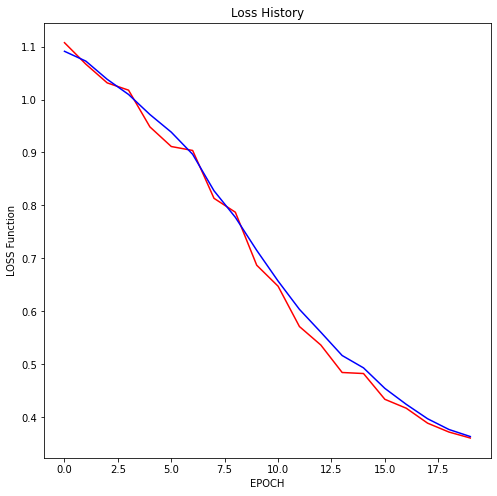

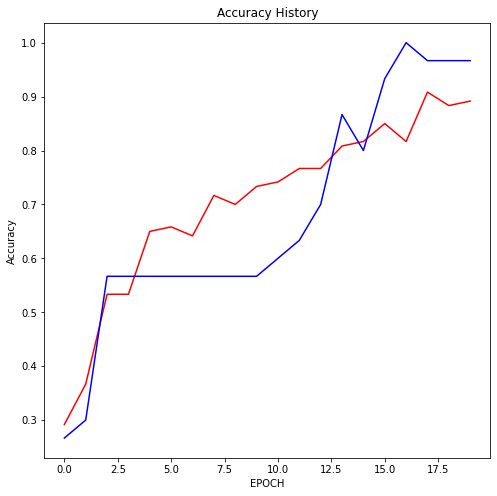

In [42]:
# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)